# BB Recipes

It turns out, the bodybuilding.com recipe database is done with angularJS and a rest API (I think). Whatever it is, you can just get all the recipes in json format by requesting

In [1]:
import bs4
import pandas as pd
import requests
import json

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [17]:
# Hacky way to get all recipes - you have to request the number. We want all of them,
# so we'll do a quick request of one recipe to get the 'total' number in the DB
url_request = 'https://cms-api.bodybuilding.com/BbcomRecipe'
url_parameters = {'sort':'publishDate', 'order': 'desc', 'limit':'1'}

fake_recipes_list = requests.get(url_request, params=url_parameters)
fake_recipes = bs4.BeautifulSoup(fake_recipes_list.content, features='html.parser')
fake = json.loads(str(fake_recipes))

# Get the total number of recipes in the db
total_recipes = fake['total']

# Change the 'limit' on the url to the total number of recipes
url_parameters = {'sort':'publishDate', 'order': 'desc', 'limit': str(total_recipes)}

all_recipes_list = requests.get(url_request, params=url_parameters)
all_recipes = bs4.BeautifulSoup(all_recipes_list.content, features='html.parser')

In [18]:
# Nice printing
json.loads(str(all_recipes))

{'total': 1670,
 '_links': {'self': [{'href': 'https://cms-api.bodybuilding.com/BbcomRecipe/?limit=1670&amp;offset=0&amp;order=desc&amp;sort=publishDate'}]},
 '_embedded': {'bb-cms:search-results': [{'id': '944aaf8f-7176-4a88-bbe8-1e7bc2b9a6a4',
    'contentType': 'BbcomRecipe',
    'locale': 'en_US',
    'docType': 'application/json',
    'name': 'Everyday Beast Rosemary Grilled Chicken Thighs',
    'slug': 'everyday-beast-rosemary-grilled-chicken-thighs',
    'modifiedDate': '2018-11-09T08:52:41.929Z',
    'publishDate': '2018-11-08T00:00:00.756Z',
    'description': "This healthy chicken recipe simplifies meal prep and keeps you on track to reach your fitness goals. If you're following a low-carb diet to lose weight, or you're looking for more protein to help you build muscle, this is the recipe for you.",
    'cookTime': 10,
    'prepTime': 60,
    'totalTime': 70,
    'servings': 2,
    'options': [],
    'directions': ['Mix all ingredients in a large bowl. Cover and let chicken m

In [ ]:
# Convert to dict/json because I'm used to these. Just get search results and get rid of data before.
all_recipes_list = json.loads(str(all_recipes))['_embedded']['bb-cms:search-results']

In [ ]:
print(len(all_recipes_list))
print(all_recipes_list[0]['schemaOrg']['nutrition'])

In [ ]:
# Dump to json file
rf = open('all_recipes.json', 'w')
json.dump(all_recipes_list, rf)
rf.close()

In [2]:
# Load from json
with open('all_recipes.json') as f:
    data = json.load(f)

In [3]:
data[0]

{'id': '944aaf8f-7176-4a88-bbe8-1e7bc2b9a6a4',
 'contentType': 'BbcomRecipe',
 'locale': 'en_US',
 'docType': 'application/json',
 'name': 'Everyday Beast Rosemary Grilled Chicken Thighs',
 'slug': 'everyday-beast-rosemary-grilled-chicken-thighs',
 'modifiedDate': '2018-11-09T08:52:41.929Z',
 'publishDate': '2018-11-08T00:00:00.756Z',
 'description': "This healthy chicken recipe simplifies meal prep and keeps you on track to reach your fitness goals. If you're following a low-carb diet to lose weight, or you're looking for more protein to help you build muscle, this is the recipe for you.",
 'cookTime': 10,
 'prepTime': 60,
 'totalTime': 70,
 'servings': 2,
 'options': [],
 'directions': ['Mix all ingredients in a large bowl. Cover and let chicken marinate for 30-60 minutes.',
  'Preheat the grill. Once chicken is done marinating, place on the grill and cook for 4-5 minutes on each side until cooked through. Serve immediately or let cool and store for meal prep.'],
 'schemaOrg': {'@con

In [12]:
recipe_0 = data[0]

In [13]:
keys_of_interest = list(recipe_0['schemaOrg'].keys())[2:]

In [21]:
# Create empty dict

dummy_dict = {}
nested_keys = []

for key in keys_of_interest:
    if isinstance(recipe_0['schemaOrg'][key], dict):
        for deep_key in recipe_0['schemaOrg'][key].keys():
            if '@' not in deep_key:
                nested_keys.append(deep_key)
                dummy_dict[deep_key] = []
    else:
        dummy_dict[key] = []

In [22]:
nested_keys

['name',
 'name',
 'logo',
 'servingSize',
 'calories',
 'carbohydrates',
 'protein',
 'fat']

In [15]:
for recipe in data:
    for key in keys_of_interest:
        if key in recipe['schemaOrg'].keys():
            if isinstance(recipe['schemaOrg'][key], dict):
                for deep_key in recipe['schemaOrg'][key].keys():
                    if '@' not in deep_key and deep_key != 'name':
                        dummy_dict[deep_key].append(recipe['schemaOrg'][key][deep_key])
            else:
                dummy_dict[key].append(recipe['schemaOrg'][key])


In [16]:
for key,value in dummy_dict.items():
    print(key, len(value))

name 1668
image 1668
url 1668
mainEntityOfPage 1668
datePublished 1668
logo 1668
description 1668
suitableForDiet 1668
prepTime 1668
cookTime 1668
totalTime 1668
recipeYield 1668
servingSize 1668
calories 1668
carbohydrates 1668
protein 1668
fat 1668
recipeIngredient 1668
recipeInstructions 1668


In [67]:
df = pd.DataFrame.from_dict(dummy_dict)

In [68]:
df.head()

name  \
0     Everyday Beast Rosemary Grilled Chicken Thighs   
1  Everyday Beast Quick Chicken, Bacon, and Colla...   
2  Everyday Beast Grilled Chicken Thighs and Broc...   
3                       Pizza Stuffed Chicken Breast   
4                          Core Camper Protein Balls   

                                               image  \
0  https://www.bodybuilding.com/images/2018/novem...   
1  http://www.bodybuilding.com/images/2018/novemb...   
2  https://www.bodybuilding.com/images/2018/novem...   
3  https://www.bodybuilding.com/images/everyday-b...   
4  https://www.bodybuilding.com/images/2018/holma...   

                                                 url  mainEntityOfPage  \
0  https://www.bodybuilding.com/recipes/everyday-...              True   
1  https://www.bodybuilding.com/recipes/everyday-...              True   
2  https://www.bodybuilding.com/recipes/everyday-...              True   
3  https://www.bodybuilding.com/recipes/pizza-stu...              True   
4  https://www.bodybuilding.com/recipes/core-camp...              True   

  datePublished                                               logo  \
0     11/8/2018  {'@type': 'ImageObject', 'url': 'https://www.b...   
1     11/8/2018  {'@type': 'ImageObject', 'url': 'https://www.b...   
2     11/8/2018  {'@type': 'ImageObject', 'url': 'https://www.b...   
3    10/19/2018  {'@type': 'ImageObject', 'url': 'https://www.b...   
4    10/15/2018  {'@type': 'ImageObject', 'url': 'https://www.b...   

                                         description suitableForDiet prepTime  \
0  This healthy chicken recipe simplifies meal pr...              []    PT60M   
1  Fitness success is 80 percent nutrition, which...              []    PT20M   
2  Fitness success is 80 percent nutrition, which...              []    PT15M   
3  Who doesn't love pizza? But, when your goals s...              []    PT20M   
4  You may have tried protein balls before, but t...              []    PT20M   

  cookTime totalTime recipeYield servingSize  calories carbohydrates protein  \
0    PT10M     PT70M           2           1  560 kcal          22 g    38 g   
1    PT15M     PT35M           1           1  405 kcal          18 g    49 g   
2    PT15M     PT30M           1           1  465 kcal          20 g    30 g   
3    PT40M     PT60M           3           1  537 kcal           9 g    77 g   
4     PT0M     PT20M          12      1 ball  307 kcal          23 g    13 g   

    fat                                   recipeIngredient  \
0  36 g  [grilled chicken thighs - 5 lb, olive oil - 2 ...   
1  15 g  [chicken thighs, slice (boneless and skinless)...   
2  29 g  [grilled chicken thighs - 6 oz, broccoli, chop...   
3  21 g  [chicken breast, pounded out to 1/4-inch - 3 p...   
4  18 g  [vanilla whey protein powder - ¾ cup(s), sugar...   

                                  recipeInstructions  
0  1. Mix all ingredients in a large bowl. Cover ...  
1  1. Heat a pan on medium heat. Once warm, add b...  
2  1. Preheat the broiler on high.\n2. Heat two p...  
3  1. Butterfly the chicken breast by slicing rig...  
4  1. Put all ingredients in a large bowl and mix...

In [76]:
macros = ['calories', 'protein', 'fat', 'carbohydrates']

df['calories'].str.extract('(\d+)')


for macro in macros:
    values = df[macro].str.extract('(\d+)')
    df[macro] = values
    

In [77]:
pd.to_numeric(df['calories'].tolist())

array([ 560.,  405.,  465., ...,  322.,  322., 1030.])

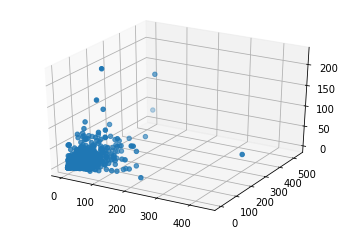

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

protein = list(pd.to_numeric(df['protein'].tolist()))
fat = list(pd.to_numeric(df['fat'].tolist()))
carbohydrates = list(pd.to_numeric(df['carbohydrates'].tolist()))

ax.scatter(protein, carbohydrates, fat)


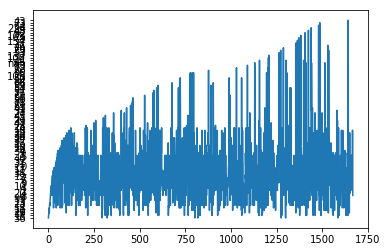

In [28]:
plt.plot(list(df['fat'].values))

In [14]:
matplotlib.__version__

'3.0.2'